# CNN and Computer Vision

## Part 4 - Supervised Learning model

### Importing libraries and data

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

import pathlib
import cv2
import glob
import PIL

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pr
from sklearn.metrics import roc_curve, auc

# from keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
train_folder='drive/My Drive/Projects/Computer Vision/jpg'

### Analysing and Visualizing data

In [ ]:
data_dir_train = pathlib.Path(train_folder)

folder_train = list(data_dir_train.glob('*'))
images_train = list(data_dir_train.glob('*/*.jpg')) #list of all images (full path)
print('Folder Structure:')
for f in folder_train:
    print(f)
print('\nNumber of images: ', len(images_train))

Folder Structure:
drive/My Drive/Projects/Computer Vision/jpg/0
drive/My Drive/Projects/Computer Vision/jpg/1
drive/My Drive/Projects/Computer Vision/jpg/10
drive/My Drive/Projects/Computer Vision/jpg/11
drive/My Drive/Projects/Computer Vision/jpg/12
drive/My Drive/Projects/Computer Vision/jpg/13
drive/My Drive/Projects/Computer Vision/jpg/14
drive/My Drive/Projects/Computer Vision/jpg/15
drive/My Drive/Projects/Computer Vision/jpg/16
drive/My Drive/Projects/Computer Vision/jpg/2
drive/My Drive/Projects/Computer Vision/jpg/3
drive/My Drive/Projects/Computer Vision/jpg/4
drive/My Drive/Projects/Computer Vision/jpg/5
drive/My Drive/Projects/Computer Vision/jpg/6
drive/My Drive/Projects/Computer Vision/jpg/7
drive/My Drive/Projects/Computer Vision/jpg/8
drive/My Drive/Projects/Computer Vision/jpg/9

Number of images:  1360


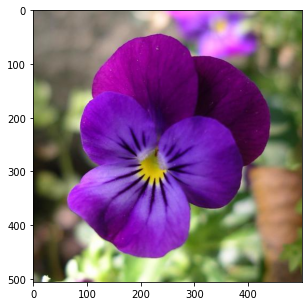

In [ ]:
filenames = glob.glob("drive/My Drive/Projects/Computer Vision/jpg/16/*.jpg")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

plt.figure(figsize= (20,5));

plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB));

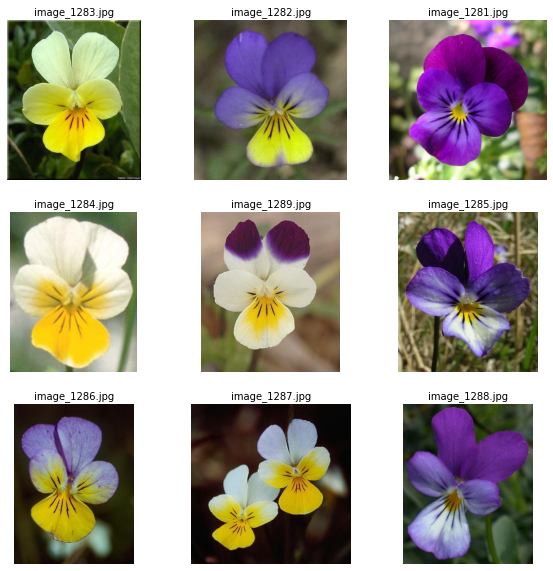

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(str(images_train[i]).split('/')[-1], fontsize=10) #get the file name and display as title
    plt.imshow(PIL.Image.open(images_train[i]))
    ax = plt.axis("off")

### Model Building

In [ ]:
x_train = []
y_train = []

for imgfolder in os.listdir(train_folder):
    for file in os.listdir(train_folder+'/' +imgfolder):
        path = train_folder+'/' +imgfolder+ "/" + file
        im = cv2.imread(path)
        ims = cv2.resize(im,(64,64))
        ims = ims/127.0

        ims_s = ims.sum(axis=2)
        ims_g = ims_s/ims_s.max()

        # Apply PCA on greyscale image
        pca = PCA()
        pca.fit(ims_g)

        # Check the Cumulative Variance and determine number of components explaining 95% variance
        c_var = np.cumsum(pca.explained_variance_ratio_)*100
        v98 = np.argmax(c_var>98)
        # print("Total number of components explaining 98% variance: "+ str(v98))

        ipca = IncrementalPCA(n_components=v98)
        ims98 = ipca.inverse_transform(ipca.fit_transform(ims_g))

        x_train.append(ims98)
        y_train.append(imgfolder)

In [ ]:
len(x_train)

1360

In [ ]:
lbl_encdr = pr.LabelEncoder()
y_train_encd = lbl_encdr.fit_transform(y_train)


x_svm,x_test_svm,y_svm,y_test_svm =  train_test_split(x_train,y_train_encd ,test_size=0.2,random_state=10)

x_array_svm = np.array(x_svm)
x_test_arr_svm = np.array(x_test_svm)

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train_encd)

In [ ]:
arr_size = len(x_array_svm[0])*len(x_array_svm[0][0])
x_arr_svm = x_array_svm.reshape(len(x_array_svm),arr_size)
x_test_arr_svm = x_test_arr_svm.reshape(len(x_test_arr_svm),arr_size)

In [ ]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=10)

# fit model
svm.fit(x_arr_svm, y_svm)

# generate predictions
y_pred = svm.predict(x_test_arr_svm)

In [ ]:
# calculate accuracy
accuracy = accuracy_score(y_test_svm, y_pred)
print('Model accuracy is: ', accuracy*100)

Model accuracy is:  25.735294117647058
